In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
filepath = r"D:\Docs\TRY HARD TIME\Data_project\cars_sales\Auto Sales data.csv"

cars = pd.read_csv(filepath)

In [3]:
cars.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
cars.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [29]:
cars.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP

In [6]:
cars.isin(['?']).sum(axis=0)

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

## Data 
- The dataset has no null values
- There are 2747 data instance, with 20 columns (variables)

In [30]:
selected_columns = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'PRODUCTLINE','MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY','DEALSIZE']

cars_db = cars[selected_columns]
print(cars_db.shape)
cars_db

(2747, 14)


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,24/02/2018,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,10022,USA,Small
1,34,81.35,5,2765.90,07/05/2018,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,51100,France,Small
2,41,94.74,2,3884.34,01/07/2018,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,75508,France,Medium
3,45,83.26,6,3746.70,25/08/2018,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,90003,USA,Medium
4,36,96.66,1,3479.76,28/10/2018,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,94217,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,20,112.22,15,2244.40,02/12/2019,Shipped,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Small
2743,29,137.19,1,3978.51,31/01/2020,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,90110,Finland,Medium
2744,43,125.99,4,5417.57,01/03/2020,Resolved,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Medium
2745,34,62.24,1,2116.16,28/03/2020,Shipped,Ships,54,S72_3212,Alpha Cognac,Toulouse,31000,France,Small


# ANALYSIS

<Axes: xlabel='class', ylabel='Count'>

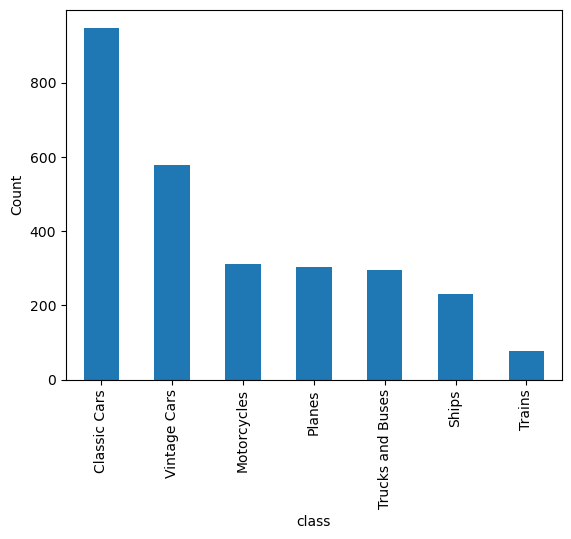

In [8]:
cars_db['PRODUCTLINE'].value_counts().plot(kind='bar', xlabel='class', ylabel='Count', rot= 90)

<Axes: xlabel='class', ylabel='Count'>

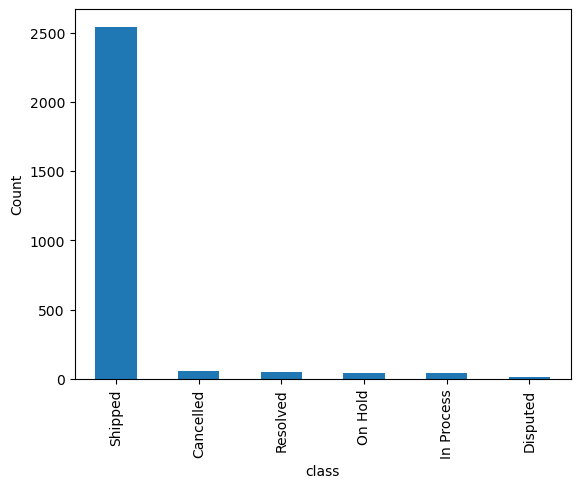

In [9]:
cars_db['STATUS'].value_counts().plot(kind='bar', xlabel='class', ylabel='Count', rot= 90)

<Figure size 2000x1200 with 0 Axes>

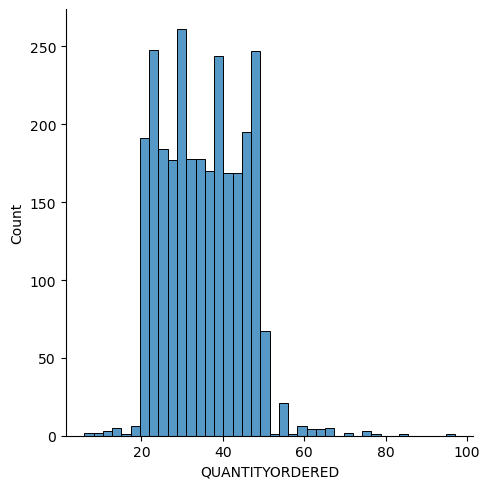

<Figure size 2000x1200 with 0 Axes>

In [11]:
sns.displot(data= cars_db.QUANTITYORDERED)
plt.figure(figsize=(20, 12))

<Axes: xlabel='class', ylabel='Count'>

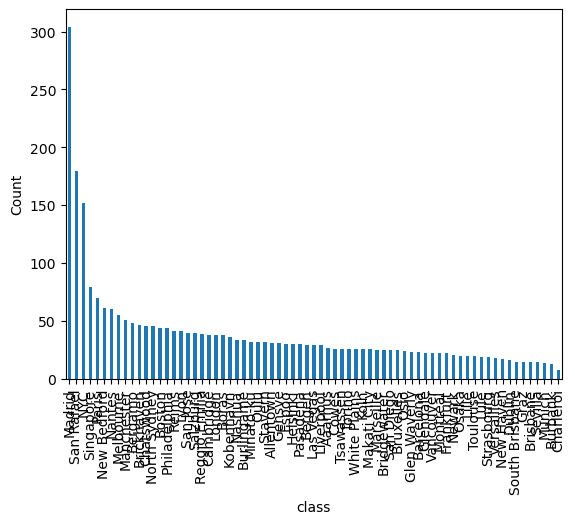

In [23]:
cars_db['CITY'].value_counts().plot(kind='bar', xlabel='class', ylabel='Count', rot= 90)

In [42]:
from datetime import datetime

#CONVERT ORDER DATE into YEAR only
cars_db['ORDERDATE'] = pd.to_datetime(cars_db['ORDERDATE'], format='%d/%m/%Y')

# Extract the year and create a new column
cars_db["YEAR"]=cars_db["ORDERDATE"].dt.year
cars_db["MONTH"]=cars_db["ORDERDATE"].dt.month


cars_db

C:\Users\sylan\AppData\Local\Temp\ipykernel_17672\201793271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_db['ORDERDATE'] = pd.to_datetime(cars_db['ORDERDATE'], format='%d/%m/%Y')
C:\Users\sylan\AppData\Local\Temp\ipykernel_17672\201793271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_db["YEAR"]=cars_db["ORDERDATE"].dt.year
C:\Users\sylan\AppData\Local\Temp\ipykernel_17672\201793271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE,YEAR,MONTH
0,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,10022,USA,Small,2018,2
1,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,51100,France,Small,2018,5
2,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,75508,France,Medium,2018,7
3,45,83.26,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,90003,USA,Medium,2018,8
4,36,96.66,1,3479.76,2018-10-28,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,94217,USA,Medium,2018,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,20,112.22,15,2244.40,2019-12-02,Shipped,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Small,2019,12
2743,29,137.19,1,3978.51,2020-01-31,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,90110,Finland,Medium,2020,1
2744,43,125.99,4,5417.57,2020-03-01,Resolved,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Medium,2020,3
2745,34,62.24,1,2116.16,2020-03-28,Shipped,Ships,54,S72_3212,Alpha Cognac,Toulouse,31000,France,Small,2020,3


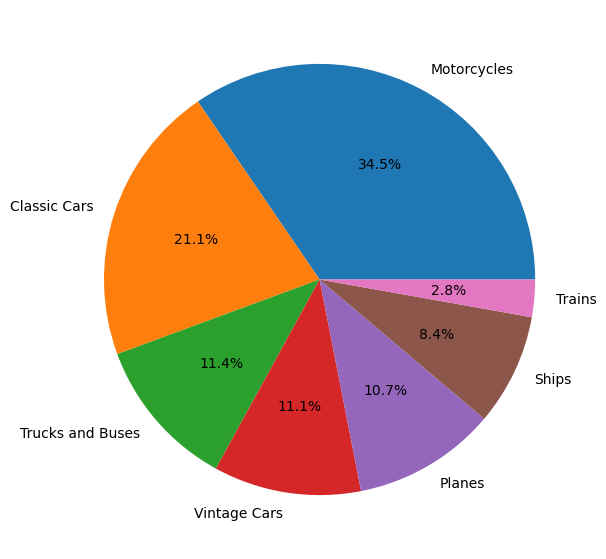

In [41]:
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(cars_db['PRODUCTLINE'].value_counts(), labels=cars_db['PRODUCTLINE'].unique(), autopct='%1.1f%%')

# show plot
plt.show()

<Axes: xlabel='YEAR'>

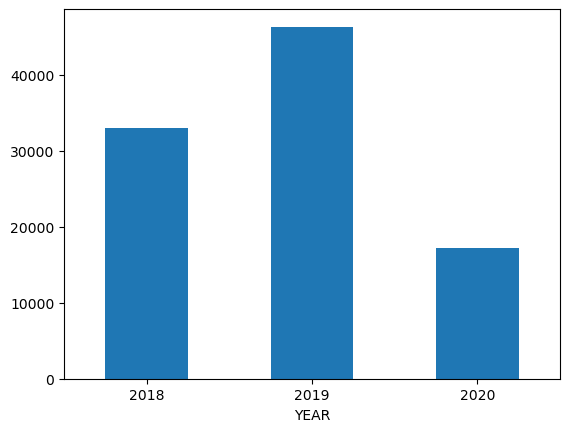

In [69]:
result_group_year= cars_db.groupby(['YEAR'])
total_by_year = result_group_year['QUANTITYORDERED'].agg([np.sum]).reset_index()
total_by_year.plot(kind='bar' ,x='YEAR',y='sum',rot=0, legend=False)

<Axes: xlabel='COUNTRY'>

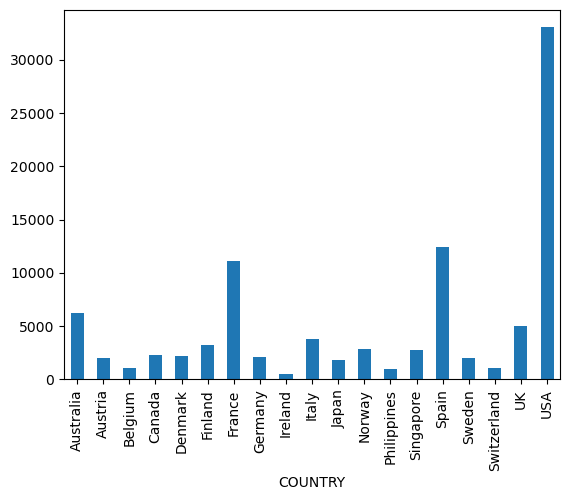

In [71]:
result_group_country= cars_db.groupby(['COUNTRY'])
total_by_country = result_group_country['QUANTITYORDERED'].agg([np.sum]).reset_index()
total_by_country.plot(kind='bar' ,x='COUNTRY',y='sum',rot=90, legend=False)

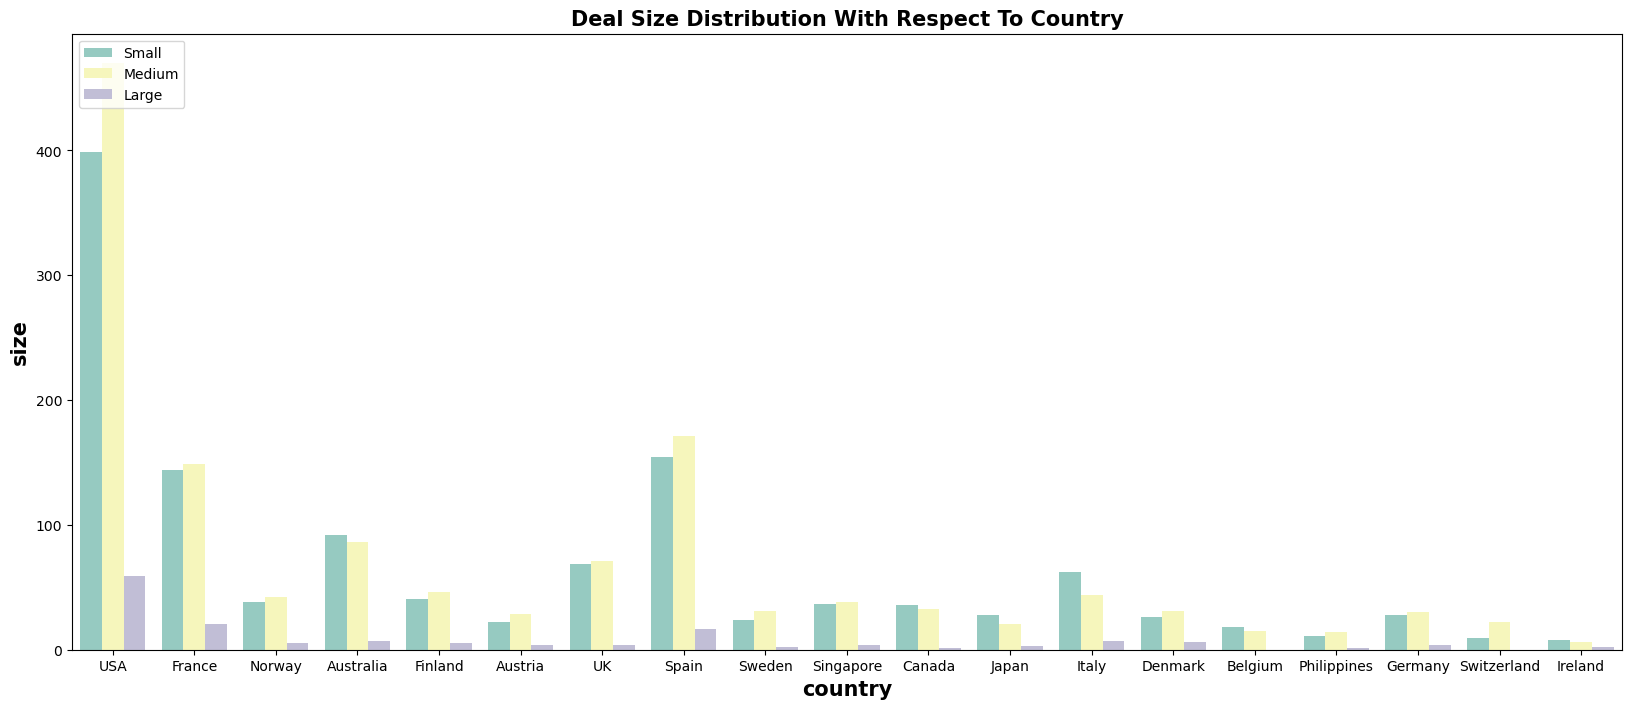

In [72]:
plt.figure(figsize=(20,8))
sns.countplot(x=cars_db['COUNTRY'], hue=cars_db['DEALSIZE'], palette='Set3')
plt.legend(loc='upper left')
plt.ylabel('size', fontsize=15, fontweight='bold')
plt.xlabel('country', fontsize=15, fontweight='bold')
plt.title('Deal Size Distribution With Respect To Country', fontsize=15, fontweight='bold')
plt.show()

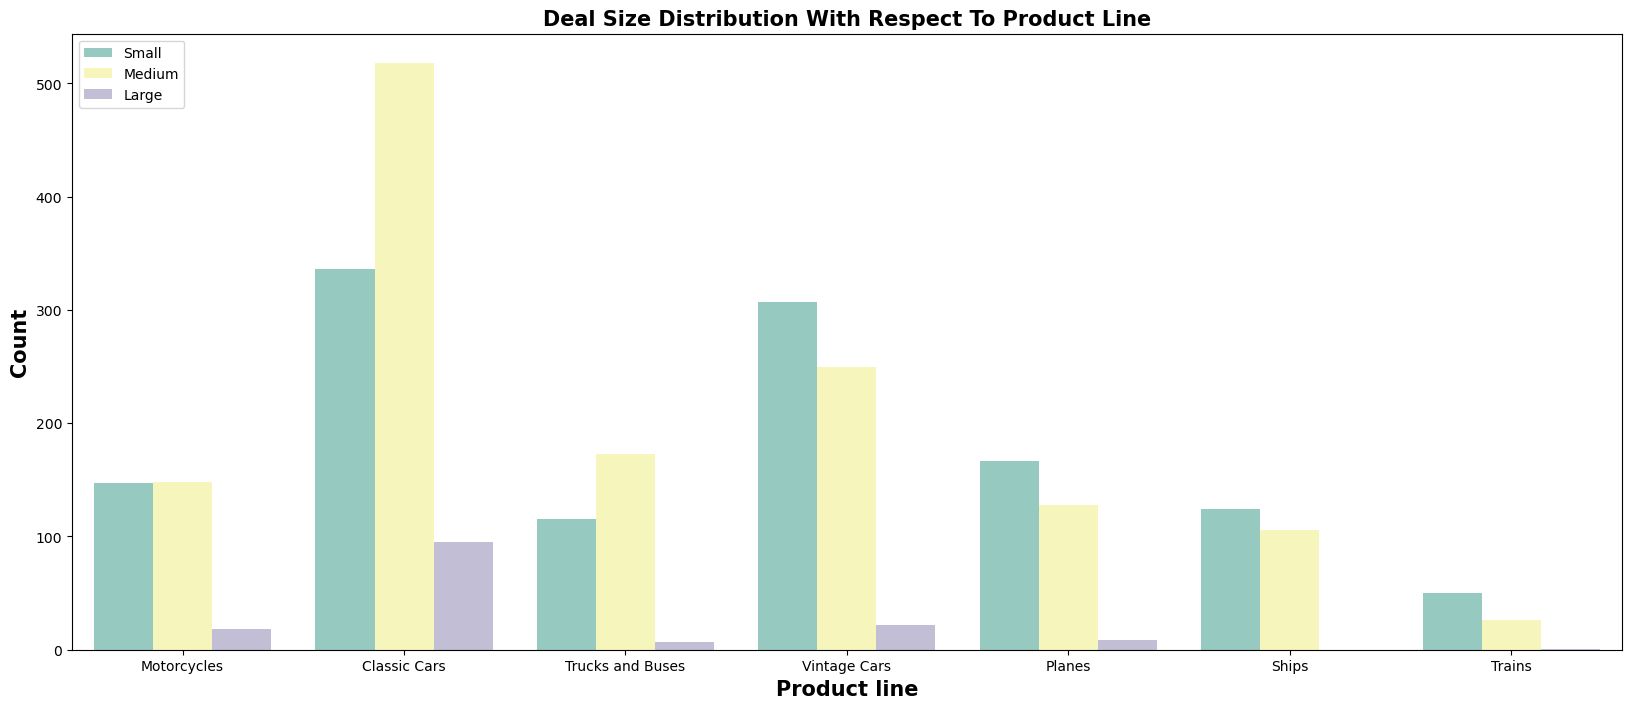

In [73]:
plt.figure(figsize=(20,8))
sns.countplot(x=cars_db['PRODUCTLINE'], hue=cars_db['DEALSIZE'], palette='Set3')
plt.legend(loc='upper left')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Product line', fontsize=15, fontweight='bold')
plt.title('Deal Size Distribution With Respect To Product Line', fontsize=15, fontweight='bold')
plt.show()